In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
train = pd.read_csv("D:/Kaggle/Housing_Prices/kaggle-housing-prices-/train.csv")
print(train.shape)
test = pd.read_csv("D:/Kaggle/Housing_Prices/kaggle-housing-prices-/test.csv")
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['SalePrice']
train = train.drop(columns = ['SalePrice'])
df = pd.concat([train, test])
index = df['Id']


(1460, 81)


In [3]:
print(train.shape)
print(test.shape)
print(df.shape)


(1460, 80)
(1459, 80)
(2919, 80)


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
Cols_Null = df.columns[df.isnull().any()].tolist()
print(Cols_Null)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [6]:
df[Cols_Null].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,2433.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2917.000000,2917.000000,2760.000000,2918.000000,2918.000000
mean,69.305795,102.201312,441.423235,49.582248,560.772104,1051.777587,0.429894,0.061364,1978.113406,1.766621,472.874572
std,23.344905,179.334253,455.610826,169.205611,439.543659,440.766258,0.524736,0.245687,25.574285,0.761624,215.394815
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,793.000000,0.000000,0.000000,1960.000000,1.000000,320.000000
50%,68.000000,0.000000,368.500000,0.000000,467.000000,989.500000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [7]:
df[Cols_Null].isnull().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

Reading the data description for a lot of variables NA is a category, ie NA -> No alley access, and not a 'missing value'. We will walk through each variable. 

First is MSZoning. NA is not defined in data scription, thus this is a missing value. 

In [8]:
print(df.MSZoning.unique())
print(df['MSZoning'].value_counts())

['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64


In [9]:
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace = True)
print(df.MSZoning.unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']


Replace MSZoning with Dummy Variables

In [10]:
MSZone_dummy_features = pd.get_dummies(df['MSZoning'], drop_first=True)
df = pd.concat([df, MSZone_dummy_features], axis=1)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,FV,RH,RL,RM
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,0,0,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,0,0,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,0,0,1,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,0,0,1,0


In [11]:
df.shape
df.drop(['MSZoning'], inplace=True, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 83 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-

Next Varible with NA is LotFrontage. This variable is continuous so NA will need to be replaced. We look at summary statistics for the variable and plot a distribution excluding NA values. 

In [13]:
df['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

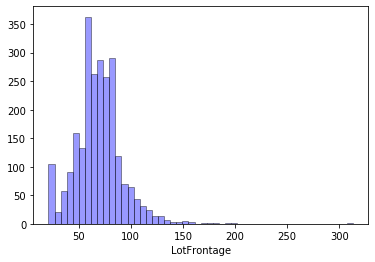

In [14]:
sea.distplot(df['LotFrontage'][~np.isnan(df['LotFrontage'])], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

In [15]:
Lotmean = np.mean(df['LotFrontage'], axis=0)
Lotsd = np.std(df['LotFrontage'], axis=0)

print(Lotmean, Lotsd)

69.30579531442663 23.34010665843215


In [16]:
final_list = [x for x in df['LotFrontage'] if (x > Lotmean - 2 * Lotsd)]
final_list = [x for x in final_list if (x < Lotmean + 2 * Lotsd)]
Lotmean2 = np.mean(final_list, axis=0)
Lotsd2 = np.std(final_list, axis=0)
print(Lotmean2, Lotsd2)

68.00607902735563 17.892474650173046


Removing Outliers didnt move the mean much, this tells us there werent many. We will use the mean replace the NAs. 

In [17]:
df['LotFrontage'] = df['LotFrontage'].fillna(Lotmean2)
df['LotFrontage'].mean()

69.08939856364951

In [18]:
 df['LotFrontage'].isnull().values.any()

False

In [19]:
Cols_Null = df.columns[df.isnull().any()].tolist()
print(Cols_Null)



['Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


Next variable to handle is Alley. This is a categorical variable, and NA means no alley access and is not a 'missing value'. We will replace NA with 'No Alley Access"

In [20]:
print(df.Alley.unique())
print(df['Alley'].value_counts())

[nan 'Grvl' 'Pave']
Grvl    120
Pave     78
Name: Alley, dtype: int64


In [21]:
df['Alley'] = df['Alley'].fillna('No alley access')
print(df.Alley.unique())
print(df['Alley'].value_counts())

['No alley access' 'Grvl' 'Pave']
No alley access    2721
Grvl                120
Pave                 78
Name: Alley, dtype: int64


In [22]:
Alley_dummy_features = pd.get_dummies(df['Alley'], drop_first=True)
df = pd.concat([df, Alley_dummy_features], axis=1)
df.head()
df.drop(['Alley'], inplace=True, axis=1)

Next is Utilities. Only 2 values missing. We will look at the counts and will likely replace with the mode. And then create dummy variables. 

In [23]:
print(df.Utilities.unique())
print(df['Utilities'].value_counts())

['AllPub' 'NoSeWa' nan]
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [24]:
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])



In [25]:
print(df.Utilities.unique())
print(df['Utilities'].value_counts())

['AllPub' 'NoSeWa']
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64


In [26]:
Utilities_dummy_features = pd.get_dummies(df['Utilities'], drop_first=True)
df = pd.concat([df, Utilities_dummy_features], axis=1)
df.head()
df.drop(['Utilities'], inplace=True, axis=1)

In [27]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal,MoSold,YrSold,FV,RH,RL,RM,No alley access,Pave,NoSeWa
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.089399,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,50.825968,6.213087,2007.792737,0.047619,0.008907,0.777321,0.157588,0.932169,0.026721,0.000343
std,842.787043,42.517628,21.317846,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,567.402211,2.714762,1.314964,0.212995,0.093973,0.416116,0.364417,0.251500,0.161296,0.018509
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,4.000000,2007.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1460.000000,50.000000,68.006079,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,6.000000,2008.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,0.000000,8.000000,2009.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,17000.000000,12.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
print(df.Exterior1st.unique)
print(df['Exterior1st'].value_counts())

<bound method Series.unique of 0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Sdng
4       VinylSd
         ...   
1454    CemntBd
1455    CemntBd
1456    VinylSd
1457    HdBoard
1458    HdBoard
Name: Exterior1st, Length: 2919, dtype: object>
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64


In [29]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
Exterior1st_dummy_features = pd.get_dummies(df['Exterior1st'], drop_first=True)
df = pd.concat([df, Exterior1st_dummy_features], axis=1)
df.head()
df.drop(['Exterior1st'], inplace=True, axis=1)

We will do the same with Exterior2nd. 

In [30]:
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
Exterior2nd_dummy_features = pd.get_dummies(df['Exterior2nd'], drop_first=True)
df = pd.concat([df, Exterior2nd_dummy_features], axis=1)
df.head()
df.drop(['Exterior2nd'], inplace=True, axis=1)

In [31]:
df.shape

(2919, 111)

In [32]:
Cols_Null = df.columns[df.isnull().any()].tolist()
print(Cols_Null)

['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


Next two are MasVnrType and MasVnrArea. 

In [33]:

print(df['MasVnrType'].value_counts())
print(df['MasVnrArea'].value_counts())

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64


Will we convert NA to none for MasVnrType and assume it was a miscode. We will then update MasVnrArea to 0 where MasVnrType is none. 

In [34]:
df.loc[df['MasVnrType'].isnull(), 'BsmtFullBath'] = 0
df['MasVnrType'] = df['MasVnrType'].fillna('None')


In [35]:
df['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [36]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'].describe()


count    2919.000000
mean      101.396026
std       178.854579
min         0.000000
25%         0.000000
50%         0.000000
75%       163.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [37]:
df['MasVnrArea'].isnull().values.any()


False

In [38]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
MasVnrType_dummy_features = pd.get_dummies(df['MasVnrType'], drop_first=True)
df = pd.concat([df, MasVnrType_dummy_features], axis=1)
df.head()
df.drop(['MasVnrType'], inplace=True, axis=1)

In [39]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.089399,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.423235,...,0.000343,0.092497,0.002055,0.016101,0.347722,0.133950,0.027749,0.301131,0.605002,0.085303
std,842.787043,42.517628,21.317846,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.610826,...,0.018509,0.289777,0.045299,0.125887,0.476329,0.340657,0.164282,0.458828,0.488934,0.279380
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1460.000000,50.000000,68.006079,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For BsmtQual and BsmtCond NA means No Basement. We will update and create dummy variables. 

In [40]:
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
Cols_Null = df.columns[df.isnull().any()].tolist()
print(Cols_Null)


['BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [41]:
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
BsmtQual_dummy_features = pd.get_dummies(df['BsmtQual'], drop_first=True)
df = pd.concat([df, BsmtQual_dummy_features], axis=1)
df.head()
df.drop(['BsmtQual'], inplace=True, axis=1)

In [42]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
BsmtCond_dummy_features = pd.get_dummies(df['BsmtCond'], drop_first=True)
df = pd.concat([df, BsmtCond_dummy_features], axis=1)
df.head()
df.drop(['BsmtCond'], inplace=True, axis=1)

In [43]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,None,Stone,Fa,Gd,No Basement,TA,Gd,No Basement,Po,TA
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.089399,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.423235,...,0.605002,0.085303,0.030147,0.414183,0.027749,0.439534,0.041795,0.028092,0.001713,0.892771
std,842.787043,42.517628,21.317846,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.610826,...,0.488934,0.279380,0.171022,0.492665,0.164282,0.496415,0.200155,0.165263,0.041359,0.309457
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1460.000000,50.000000,68.006079,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For 'BsmtExposure', 'BsmtFinType1'& 'BsmtFinType2'NA will be updated to No Basement and dummy variables with be created. For 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF' & 'TotalBsmtSF' we will update the 1 NA with 0. 

In [44]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

In [45]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtExposure'].replace(to_replace ="No", value ="No Exposure")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')

BsmtExposure_dummy_features = pd.get_dummies(df['BsmtExposure'], drop_first=True)
df = pd.concat([df, BsmtExposure_dummy_features], axis=1)
df.head()
df.drop(['BsmtExposure'], inplace=True, axis=1)

BsmtFinType1_dummy_features = pd.get_dummies(df['BsmtFinType1'], drop_first=True)
df = pd.concat([df, BsmtFinType1_dummy_features], axis=1)
df.head()
df.drop(['BsmtFinType1'], inplace=True, axis=1)

BsmtFinType2_dummy_features = pd.get_dummies(df['BsmtFinType2'], drop_first=True)
df = pd.concat([df, BsmtFinType2_dummy_features], axis=1)
df.head()
df.drop(['BsmtFinType2'], inplace=True, axis=1)

In [46]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,LwQ,No Basement,Rec,Unf,BLQ,GLQ,LwQ,No Basement,Rec,Unf
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.089399,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,...,0.052758,0.027064,0.098664,0.291538,0.023296,0.011648,0.029805,0.027407,0.035971,0.854060
std,842.787043,42.517628,21.317846,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,...,0.223588,0.162298,0.298261,0.454549,0.150867,0.107313,0.170077,0.163293,0.186250,0.353107
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1460.000000,50.000000,68.006079,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
Cols_Null = df.columns[df.isnull().any()].tolist()
print(Cols_Null)


['Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


We will update Electrical with the mode

In [48]:
print(df['Electrical'].value_counts())


SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64


In [49]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
Electrical_dummy_features = pd.get_dummies(df['Electrical'], drop_first=True)
df = pd.concat([df, Electrical_dummy_features], axis=1)
df.head()
df.drop(['Electrical'], inplace=True, axis=1)

In [50]:
Cols_Null = df.columns[df.isnull().any()].tolist()
print(Cols_Null)


['BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [51]:
print(df['BsmtFullBath'].value_counts())
print(df['BsmtHalfBath'].value_counts())

0.0    1715
1.0    1162
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64
0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64


In [52]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)

In [53]:
print(df['KitchenQual'].value_counts())
print(df.KitchenQual.unique())

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64
['Gd' 'TA' 'Ex' 'Fa' nan]


In [54]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
KitchenQual_dummy_features = pd.get_dummies(df['KitchenQual'], drop_first=True)
df = pd.concat([df, KitchenQual_dummy_features], axis=1)
df.head()
df.drop(['KitchenQual'], inplace=True, axis=1)


In [55]:
print(df['Functional'].value_counts())
print(df.Functional.unique())

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' nan]


In [56]:
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
Functional_dummy_features = pd.get_dummies(df['Functional'], drop_first=True)
df = pd.concat([df, Functional_dummy_features], axis=1)
df.head()
df.drop(['Functional'], inplace=True, axis=1)


In [57]:
Cols_Null = df.columns[df.isnull().any()].tolist()
print(Cols_Null)


['FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


For FireplaceQu, NA means No Fireplace, so we will update and create dummy variables. 

In [58]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
FireplaceQu_dummy_features = pd.get_dummies(df['FireplaceQu'], drop_first=True)
df = pd.concat([df, FireplaceQu_dummy_features], axis=1)
df.drop(['FireplaceQu'], inplace=True, axis=1)


For 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', NA means No Garage.  For 'GarageYrBlt', 'GarageCars', 'GarageArea' we will fill NA with 0 since in most cases this is because there is no garage. 

In [59]:
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')

GarageType_dummy_features = pd.get_dummies(df['GarageType'], drop_first=True)
df = pd.concat([df, GarageType_dummy_features], axis=1)
df.drop(['GarageType'], inplace=True, axis=1)

GarageFinish_dummy_features = pd.get_dummies(df['GarageFinish'], drop_first=True)
df = pd.concat([df, GarageFinish_dummy_features], axis=1)
df.drop(['GarageFinish'], inplace=True, axis=1)

GarageQual_dummy_features = pd.get_dummies(df['GarageQual'], drop_first=True)
df = pd.concat([df, GarageQual_dummy_features], axis=1)
df.drop(['GarageQual'], inplace=True, axis=1)

GarageCond_dummy_features = pd.get_dummies(df['GarageCond'], drop_first=True)
df = pd.concat([df, GarageCond_dummy_features], axis=1)
df.drop(['GarageCond'], inplace=True, axis=1)


In [60]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)

NA means no pool for Pool Quality. We could remove this column alltogether because of the small amount of observations. We can say the same for Fence and Misc Feature. 

In [61]:
print(df['PoolQC'].value_counts())
print(df.PoolQC.unique())

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
[nan 'Ex' 'Fa' 'Gd']


In [62]:
df['PoolQC'] = df['PoolQC'].fillna('No Pool')

PoolQC_dummy_features = pd.get_dummies(df['PoolQC'], drop_first=True)
df = pd.concat([df, PoolQC_dummy_features], axis=1)
df.drop(['PoolQC'], inplace=True, axis=1)

In [63]:
print(df['Fence'].value_counts())
print(df.Fence.unique())

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [64]:
df['Fence'] = df['Fence'].fillna('No Fence')

Fence_dummy_features = pd.get_dummies(df['Fence'], drop_first=True)
df = pd.concat([df, Fence_dummy_features], axis=1)
df.drop(['Fence'], inplace=True, axis=1)

In [65]:
print(df['MiscFeature'].value_counts())
print(df.MiscFeature.unique())

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [66]:
df['MiscFeature'] = df['MiscFeature'].fillna('No Misc Feature')

MiscFeature_dummy_features = pd.get_dummies(df['MiscFeature'], drop_first=True)
df = pd.concat([df, MiscFeature_dummy_features], axis=1)
df.drop(['MiscFeature'], inplace=True, axis=1)

In [67]:
print(df['SaleType'].value_counts())
print(df.SaleType.unique())

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth' nan]


In [68]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

SaleType_dummy_features = pd.get_dummies(df['SaleType'], drop_first=True)
df = pd.concat([df, SaleType_dummy_features], axis=1)
df.drop(['SaleType'], inplace=True, axis=1)

We will now check to make sure there are no more columns with missing info. 

In [69]:
Cols_Null = df.columns[df.isnull().any()].tolist()
print(Cols_Null)


[]


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 176 entries, Id to WD
dtypes: float64(11), int64(26), object(20), uint8(119)
memory usage: 1.6+ MB


We now need to make sure all categorical features have been converted to dummy variables. 


In [71]:
print(df['SaleCondition'].value_counts())
print(df.SaleCondition.unique())

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [72]:
SaleCondition_dummy_features = pd.get_dummies(df['SaleCondition'], drop_first=True)
df = pd.concat([df, SaleCondition_dummy_features], axis=1)
df.drop(['SaleCondition'], inplace=True, axis=1)

In [73]:
print(df['PavedDrive'].value_counts())
print(df.PavedDrive.unique())

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64
['Y' 'N' 'P']


In [74]:
PavedDrive_dummy_features = pd.get_dummies(df['PavedDrive'], drop_first=True)
df = pd.concat([df, PavedDrive_dummy_features], axis=1)
df.drop(['PavedDrive'], inplace=True, axis=1)

In [75]:
print(df['CentralAir'].value_counts())
print(df.CentralAir.unique())

Y    2723
N     196
Name: CentralAir, dtype: int64
['Y' 'N']


In [76]:
CentralAir_dummy_features = pd.get_dummies(df['CentralAir'], drop_first=True)
df = pd.concat([df, CentralAir_dummy_features], axis=1)
df.drop(['CentralAir'], inplace=True, axis=1)

In [77]:
print(df['HeatingQC'].value_counts())
print(df.HeatingQC.unique())

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64
['Ex' 'Gd' 'TA' 'Fa' 'Po']


In [78]:
HeatingQC_dummy_features = pd.get_dummies(df['HeatingQC'], drop_first=True)
df = pd.concat([df, HeatingQC_dummy_features], axis=1)
df.drop(['HeatingQC'], inplace=True, axis=1)

In [79]:
print(df['Heating'].value_counts())
print(df.Heating.unique())

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


In [80]:
Heating_dummy_features = pd.get_dummies(df['Heating'], drop_first=True)
df = pd.concat([df, Heating_dummy_features], axis=1)
df.drop(['Heating'], inplace=True, axis=1)

In [81]:
print(df['Foundation'].value_counts())
print(df.Foundation.unique())

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


In [82]:
Foundation_dummy_features = pd.get_dummies(df['Foundation'], drop_first=True)
df = pd.concat([df, Foundation_dummy_features], axis=1)
df.drop(['Foundation'], inplace=True, axis=1)

In [83]:
print(df['ExterCond'].value_counts())
print(df.ExterCond.unique())

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64
['TA' 'Gd' 'Fa' 'Po' 'Ex']


In [84]:
ExterCond_dummy_features = pd.get_dummies(df['ExterCond'], drop_first=True)
df = pd.concat([df, ExterCond_dummy_features], axis=1)
df.drop(['ExterCond'], inplace=True, axis=1)

In [85]:
print(df['ExterQual'].value_counts())
print(df.ExterQual.unique())

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64
['Gd' 'TA' 'Ex' 'Fa']


In [86]:
ExterQual_dummy_features = pd.get_dummies(df['ExterQual'], drop_first=True)
df = pd.concat([df, ExterQual_dummy_features], axis=1)
df.drop(['ExterQual'], inplace=True, axis=1)

In [87]:
print(df['RoofMatl'].value_counts())
print(df.RoofMatl.unique())

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


In [88]:
RoofMatl_dummy_features = pd.get_dummies(df['RoofMatl'], drop_first=True)
df = pd.concat([df, RoofMatl_dummy_features], axis=1)
df.drop(['RoofMatl'], inplace=True, axis=1)

In [89]:
print(df['RoofStyle'].value_counts())
print(df.RoofStyle.unique())

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


In [90]:
RoofStyle_dummy_features = pd.get_dummies(df['RoofStyle'], drop_first=True)
df = pd.concat([df, RoofStyle_dummy_features], axis=1)
df.drop(['RoofStyle'], inplace=True, axis=1)

In [91]:
df['OverallCond'].describe()

count    2919.000000
mean        5.564577
std         1.113131
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In [92]:
print(df['HouseStyle'].value_counts())
print(df.HouseStyle.unique())

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


In [93]:
HouseStyle_dummy_features = pd.get_dummies(df['HouseStyle'], drop_first=True)
df = pd.concat([df, HouseStyle_dummy_features], axis=1)
df.drop(['HouseStyle'], inplace=True, axis=1)

In [94]:
print(df['BldgType'].value_counts())
print(df.BldgType.unique())

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


In [95]:
BldgType_dummy_features = pd.get_dummies(df['BldgType'], drop_first=True)
df = pd.concat([df, BldgType_dummy_features], axis=1)
df.drop(['BldgType'], inplace=True, axis=1)

In [96]:
print(df['Condition1'].value_counts())
print(df.Condition2.unique())

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


In [97]:
Condition1_dummy_features = pd.get_dummies(df['Condition1'], drop_first=True)
df = pd.concat([df, Condition1_dummy_features], axis=1)
df.drop(['Condition1'], inplace=True, axis=1)

Condition2_dummy_features = pd.get_dummies(df['Condition2'], drop_first=True)
df = pd.concat([df, Condition2_dummy_features], axis=1)
df.drop(['Condition2'], inplace=True, axis=1)

In [98]:
print(df['Neighborhood'].value_counts())
print(df.Neighborhood.unique())

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [99]:
Neighborhood_dummy_features = pd.get_dummies(df['Neighborhood'], drop_first=True)
df = pd.concat([df, Neighborhood_dummy_features], axis=1)
df.drop(['Neighborhood'], inplace=True, axis=1)

In [100]:
print(df['LandSlope'].value_counts())
print(df.LandSlope.unique())

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
['Gtl' 'Mod' 'Sev']


In [101]:
LandSlope_dummy_features = pd.get_dummies(df['LandSlope'], drop_first=True)
df = pd.concat([df, LandSlope_dummy_features], axis=1)
df.drop(['LandSlope'], inplace=True, axis=1)

In [102]:
LandContour_dummy_features = pd.get_dummies(df['LandContour'], drop_first=True)
df = pd.concat([df, LandContour_dummy_features], axis=1)
df.drop(['LandContour'], inplace=True, axis=1)

In [103]:
LotShape_dummy_features = pd.get_dummies(df['LotShape'], drop_first=True)
df = pd.concat([df, LotShape_dummy_features], axis=1)
df.drop(['LotShape'], inplace=True, axis=1)

In [104]:
Street_dummy_features = pd.get_dummies(df['Street'], drop_first=True)
df = pd.concat([df, Street_dummy_features], axis=1)
df.drop(['Street'], inplace=True, axis=1)

In [105]:
print(df.MSSubClass.unique())

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]


In [106]:
print(df['MSSubClass'].value_counts())

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64


In [107]:
MSSubClass_dummy_features = pd.get_dummies(df['MSSubClass'], drop_first=True)
df = pd.concat([df, MSSubClass_dummy_features], axis=1)
df.drop(['MSSubClass'], inplace=True, axis=1)

In [108]:
LotConfig_dummy_features = pd.get_dummies(df['LotConfig'], drop_first=True)
df = pd.concat([df, LotConfig_dummy_features], axis=1)
df.drop(['LotConfig'], inplace=True, axis=1)

In [109]:
df.shape

(2919, 274)

Need to remove duplicate columns

In [110]:
df = df.loc[:,~df.columns.duplicated()]

In [111]:
df.shape

(2919, 203)

In [112]:
train = df[:ntrain]
test = df[ntrain:]

In [113]:
train.shape


(1460, 203)

In [114]:
test.shape

(1459, 203)

In [115]:
export_csv = df.to_csv (r'D:/Kaggle/Housing_Prices/kaggle-housing-prices-/dfexport.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


Modelling 

In [116]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(train, y_train)

C:\Users\Brian\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Brian\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:46:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [118]:
y_pred= classifier.predict(test)

In [119]:
y_pred

array([122935.26, 157137.56, 182236.45, ..., 170377.38, 120413.34,
       238894.34], dtype=float32)

In [125]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [126]:
y_pred = rf.predict(test)

In [127]:
y_pred

array([127734.458, 154494.426, 182827.505, ..., 151965.306, 112287.831,
       233076.688])

In [128]:
pred = pd.DataFrame(y_pred)
submission = pd.read_csv('D:/Kaggle/Housing_Prices/kaggle-housing-prices-/sample_submission.csv')
datasets = pd.concat([submission['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('D:/Kaggle/Housing_Prices/kaggle-housing-prices-/sample_submission.csv',index=False)